# Advanced Regression techniques

Hello Everyone! 
<br>
The link for this challenge is the following: https://www.kaggle.com/c/house-prices-advanced-regression-techniques


<b> Context

Use ML techniques to predict the price house
<br>
The challenge is to deal with a high number of categorical features

<b> Methodology

* Exploration
* Feature Engeniering exploring different techniques to deal with selection of categorical features
* Selecting relevant features
* preparation of functions for feture preparations

<b> Result

Final test using Mean Logaritmic Square Error and some remarks

### General Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta  

import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()

In [2]:
from sklearn.linear_model import Ridge, Lasso

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Processing

the submission contains the forecasted prices, then I merge the submission and the Test set

In [4]:
train = pd.read_csv(r'C:\Users\Miguel\kaggle\ART\train.csv')
ss = pd.read_csv(r'C:\Users\Miguel\kaggle\ART\sample_submission.csv')
test = pd.read_csv(r'C:\Users\Miguel\kaggle\ART\test.csv')
test = test.merge(ss, left_on = 'Id', right_on = 'Id', how = 'inner')

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Measuring null data

Droping those that have high number of empty rows

In [6]:
def nullcalc(df,variable):
    nulls = len(df[df[variable].isna()])
    rows = len(df)
    value = round(len(df[df[variable].isna()])/len(train)*100,2)
    string =  'The column ' + variable + ' has ' + str(value) + '% of nulls'
    return string,value

In [7]:
for variable in train.columns:
    if nullcalc(train,variable)[1] > 50 :
        print(nullcalc(train,variable)[0])

The column Alley has 93.77% of nulls
The column PoolQC has 99.52% of nulls
The column Fence has 80.75% of nulls
The column MiscFeature has 96.3% of nulls


In [8]:
for variable in train.columns:
    if nullcalc(train,variable)[1] > 50 :
        print(nullcalc(train,variable)[0])

The column Alley has 93.77% of nulls
The column PoolQC has 99.52% of nulls
The column Fence has 80.75% of nulls
The column MiscFeature has 96.3% of nulls


In [9]:
todrop =['Alley','PoolQC','Fence','MiscFeature']
train = train.drop(columns = todrop).reset_index(drop = True)
test = test.drop(columns = todrop)

### Data Exploration

Target distribution

Text(0.5, 1.0, 'Price Distribution')

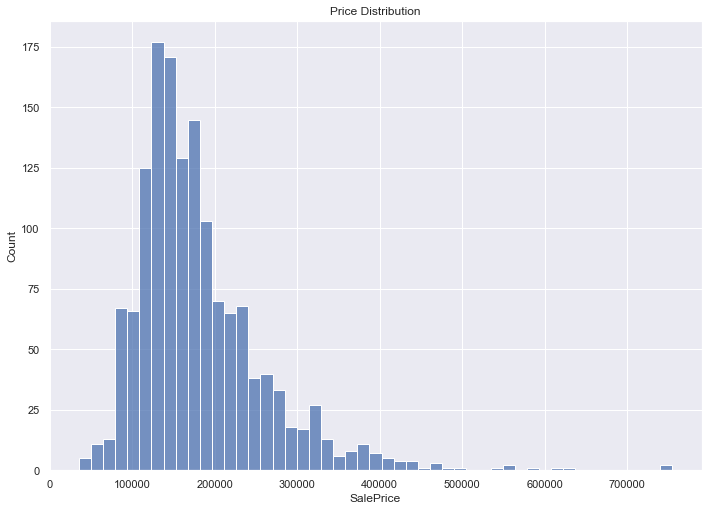

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot( data=train, x="SalePrice").set_title("Price Distribution")

#### Categoricals exploration

In [11]:
unique_values_cond = []
objects_count = []
for column in list(train.columns):
    unique_list = list(train[column].unique())
    unique_values_cond.append(unique_list)
    objects_count.append(len(unique_list))

In [12]:
summarycolumns = pd.DataFrame({'Column':train.columns, 'UniqueValues' : unique_values_cond, 'countObjects':objects_count})

Quick tabular viz ov features and unique categories

In [13]:
categorical_columns = ['MSSubClass' , 'MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                      'Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st',
                      'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                      'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                      'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageCars','PavedDrive',
                        'SaleType','SaleCondition']
numericals_columns = ['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                    '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                    '3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold','MoSold']

In [14]:
len(categorical_columns),len(numericals_columns)

(46, 21)

In [15]:
pd.set_option('display.max_colwidth', None)
summarycolumns[summarycolumns.Column.isin(categorical_columns)]

,Column,UniqueValues,countObjects
1,MSSubClass,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]",15
2,MSZoning,"[RL, RM, C (all), FV, RH]",5
5,Street,"[Pave, Grvl]",2
6,LotShape,"[Reg, IR1, IR2, IR3]",4
7,LandContour,"[Lvl, Bnk, Low, HLS]",4
8,Utilities,"[AllPub, NoSeWa]",2
9,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
10,LandSlope,"[Gtl, Mod, Sev]",3
11,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst, NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes, SawyerW, IDOTRR, MeadowV, Edwards, Timber, Gilbert, StoneBr, ClearCr, NPkVill, Blmngtn, BrDale, SWISU, Blueste]",25
12,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]",9


In [16]:
for column in categorical_columns:
    train[column] = train[column].astype('category',copy=False)
    test[column] = test[column].astype('category',copy=False)

Null plot for categoricals and numericals

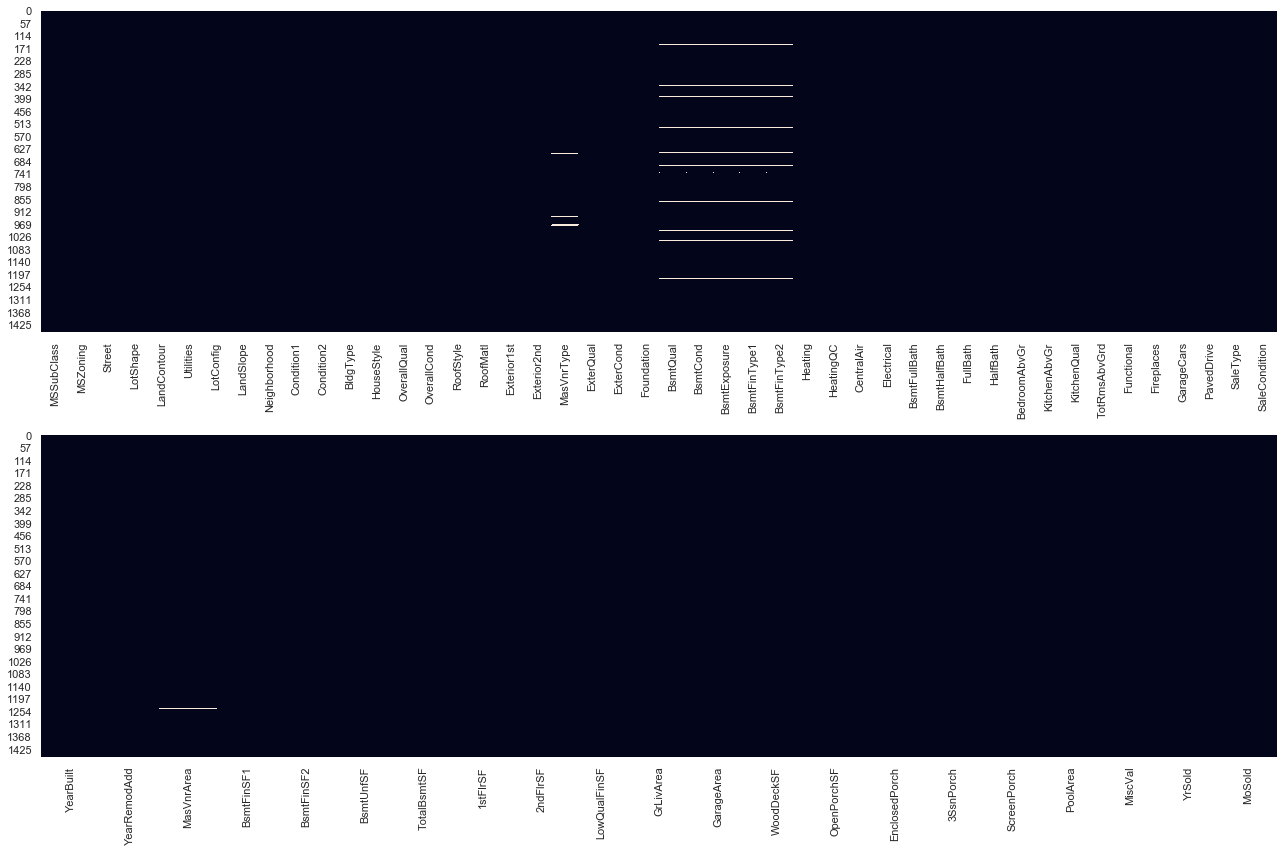

In [17]:
a4_dims = (18, 12)
fig, axs = plt.subplots(2,1, figsize=a4_dims)
sns.heatmap( ax = axs[0], data = train[categorical_columns].isnull() , cbar=False)
sns.heatmap( ax = axs[1], data = train[numericals_columns].isnull() , cbar=False)
fig.tight_layout()

Zero plot for the Numericals

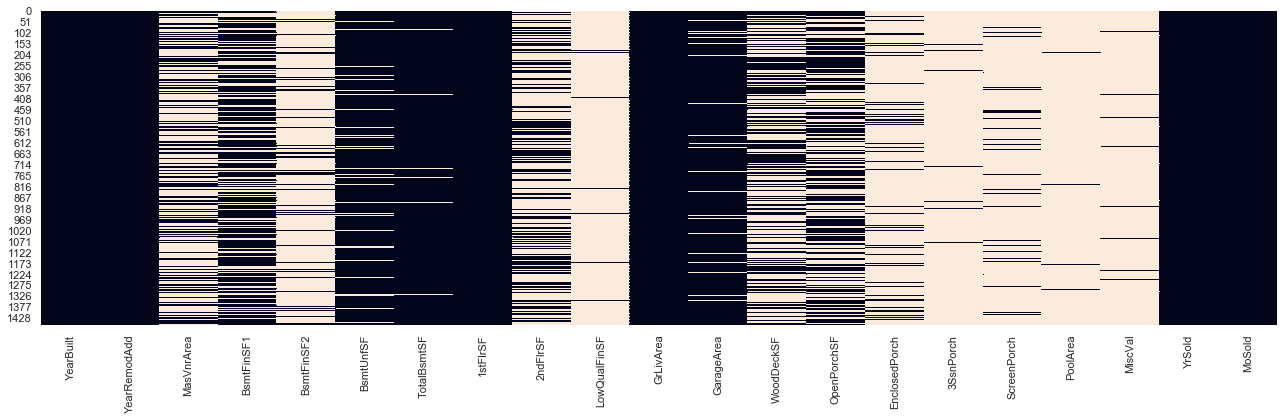

In [18]:
a4_dims = (18, 6)
fig, axs = plt.subplots(1,1, figsize=a4_dims)
sns.heatmap( ax = axs, data = train[numericals_columns] == 0 , cbar=False)
fig.tight_layout()

Sale price distribution by categories

In [19]:
def categorical_target_plot(data,listx,n,order):
    rsize = 5.25 * n
    a4_dims = (20.0,rsize)
    fig, ax = plt.subplots(n,1,figsize=a4_dims)
    if n == 1:
        sns.violinplot(data=data, x=listx[0], y="SalePrice",split=True, inner="quart", linewidth=1,scale="count")
    else:
        if order:
            for y,x in zip(range(n),order):
                sns.violinplot(ax = ax[y], data=data, x=listx[x], y="SalePrice",split=True, inner="quart", linewidth=1,scale="count")
        else:
            for y in range(n):
                sns.violinplot(ax = ax[y], data=data, x=listx[y], y="SalePrice",split=True, inner="quart", linewidth=1,scale="count")
    return fig.show()

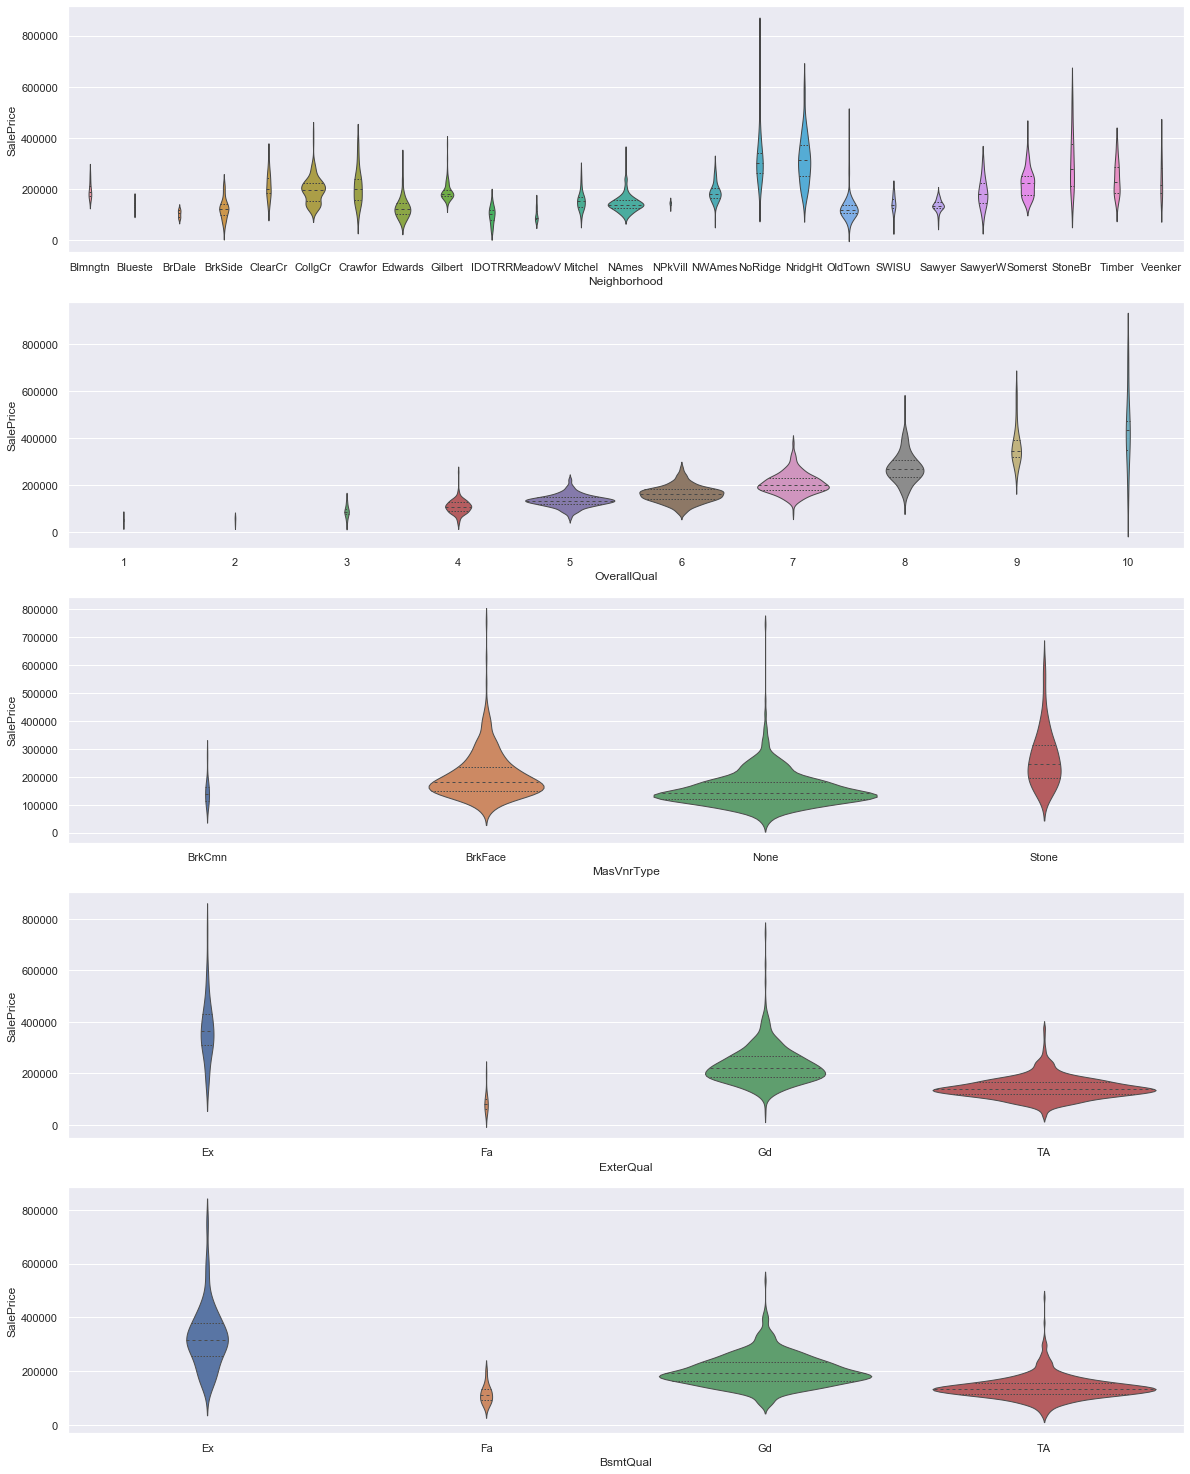

In [20]:
categorical_target_plot(train,listx = ['Neighborhood','OverallQual','MasVnrType','ExterQual','BsmtQual'], n=5, order = None)

In [21]:
categorical_columns[45],categorical_columns[42]

('SaleCondition', 'GarageCars')

Comments of categorical columns after visual inspection:
* traying to take the variables with categories with low standard deviation or with good represetation to the target
* good variables (others can not be in this list)
    + 'Neighborhood' - select the ones that have low standard deviation and combine some
    + 'OverallQual', - good, very good but check the 10 level - to numerical
    + 'MasVnrType' - check the stone
    + 'ExterQual' - good
    + 'BsmtQual' - good
    + 'FullBath' - good 
    + 'TotRmsAbvGrd' -  good but drop the high stadv
    + 'KitchenQual' - good - but drop some
    + 'Fireplaces'
    + 'GarageCars'
    + 'SaleCondition' - some to be selected
    + 'BsmtExposure'
    + 'BsmtFinType1'
* Categoricals to drop (todo): 
    + 'Street','Utilities', 'LandSlope','Condition2','RoofMatl','BsmtFinType2','CentralAir', 'Electrical', 'BsmtHalfBath','KitchenAbvGr'
* no clear categorical variable for high prices

In [22]:
categorical_to_drop = ['Street','Utilities', 'LandSlope','Condition2','RoofMatl','BsmtFinType2','CentralAir', 'Electrical', 'BsmtHalfBath','KitchenAbvGr','Heating', 'Functional' 'PavedDrive']

one goal, find the combinations that can find the distribution of high values
<br> 
another goal is to find the relevant sub catoricals

In [23]:
my_categorical_selection = ['MasVnrType','Fireplaces','SaleCondition' ,'BsmtExposure','BsmtFinType1']

In [24]:
dict_to_replace = {'Neighborhood': {'Crawfor':'CollgCr','NWAmes':'CollgCr','Gilbert':'CollgCr','ClearCr':'CollgCr','Blmngtn':'CollgCr','Veenker':'CollgCr' , 'BrkSide':'Edwards', 'NPkVill':'Edwards','BrDale':'Edwards',
                                   'SWISU':'Edwards','Blueste':'Edwards','NoRidge':'NridgHt','StoneBr':'NridgHt',  'Somerst':'Timber', 'NAmes':'Mitchel',
                                   'MeadowV':'Edwards','IDOTRR':'Edwards','Sawyer':'Edwards'},
                   'MasVnrType':{'BrkCmn':'None'},
                   'Fireplaces':{2:1,3:1},
                   'GarageCars':{4:2},
                   'TotRmsAbvGrd':{14:6},
                   'OverallQual':{1:2},
                   'TotRmsAbvGrd':{11:10,12:10},
                   'SaleCondition':{'Alloca':'Normal','Family':'Normal','AdjLand':'Abnorml'},
                   'BsmtExposure':{'Mn':'Av'},
                   'BsmtFinType1':{'BLQ':'LwQ','Rec':'LwQ','ALQ':'Unf'}}
dict_to_replace_2 = {'Neighborhood':{'Edwards':1,'OldTown':2,'Mitchel':3,'SawyerW':4,'CollgCr':5,'Timber':6,'NridgHt':7},
                    'MasVnrType':{np.nan: 'Stone'},
                    'BsmtQual':{np.nan: 'Fa'},
                    'BsmtExposure':{np.nan: 'Null'},
                    'BsmtFinType1':{np.nan: 'Null'}
                    }

In [25]:
replacer_categorical = {"Neighborhood": dict_to_replace['Neighborhood'],
                               "MasVnrType": dict_to_replace['MasVnrType'] ,
                               "GarageCars": dict_to_replace['GarageCars'] ,
                               "SaleCondition": dict_to_replace['SaleCondition'] ,
                               "BsmtExposure": dict_to_replace['BsmtExposure'] ,
                               "BsmtFinType1": dict_to_replace['BsmtFinType1'] ,
                               "Neighborhood": dict_to_replace['Neighborhood'] ,
                               "TotRmsAbvGrd": dict_to_replace['TotRmsAbvGrd'] ,
                               "OverallQual": dict_to_replace['OverallQual'] ,
                              "Fireplaces": dict_to_replace['Fireplaces'] }

replacer_categorical_2 = {"Neighborhood": dict_to_replace_2['Neighborhood'],
                         "BsmtQual": dict_to_replace_2['BsmtQual'],
                         "BsmtExposure": dict_to_replace_2['BsmtExposure'],
                          "BsmtFinType1": dict_to_replace_2['BsmtFinType1'],
                         "MasVnrType": dict_to_replace_2['MasVnrType']}

In [26]:
def convert_categoricals(data,replacer_categorical,replacer_categorical_2):
    data = data.copy()
    data = data.replace(replacer_categorical)
    data = data.replace(replacer_categorical_2)
    data['GenQual'] = np.where((data.ExterQual == 'Ex') & (data.BsmtQual == 'Ex') & (data.KitchenQual == 'Ex'), 'Sup',
                            np.where((data.ExterQual == 'TA') & (data.BsmtQual == 'TA') & (data.KitchenQual == 'TA'), 'TA',
                            np.where((data.ExterQual == 'Gd') | (data.BsmtQual == 'Gd') | (data.KitchenQual == 'Gd'), 'Gd', 'Fa'
                                    ))) 
    return data

In [27]:
## Replicate this
train_exp = convert_categoricals(train,replacer_categorical,replacer_categorical_2)

In [28]:
additional_numerical = ['OverallQual','TotRmsAbvGrd','GarageCars','FullBath','Neighborhood']
additional_categorical = ['GenQual']

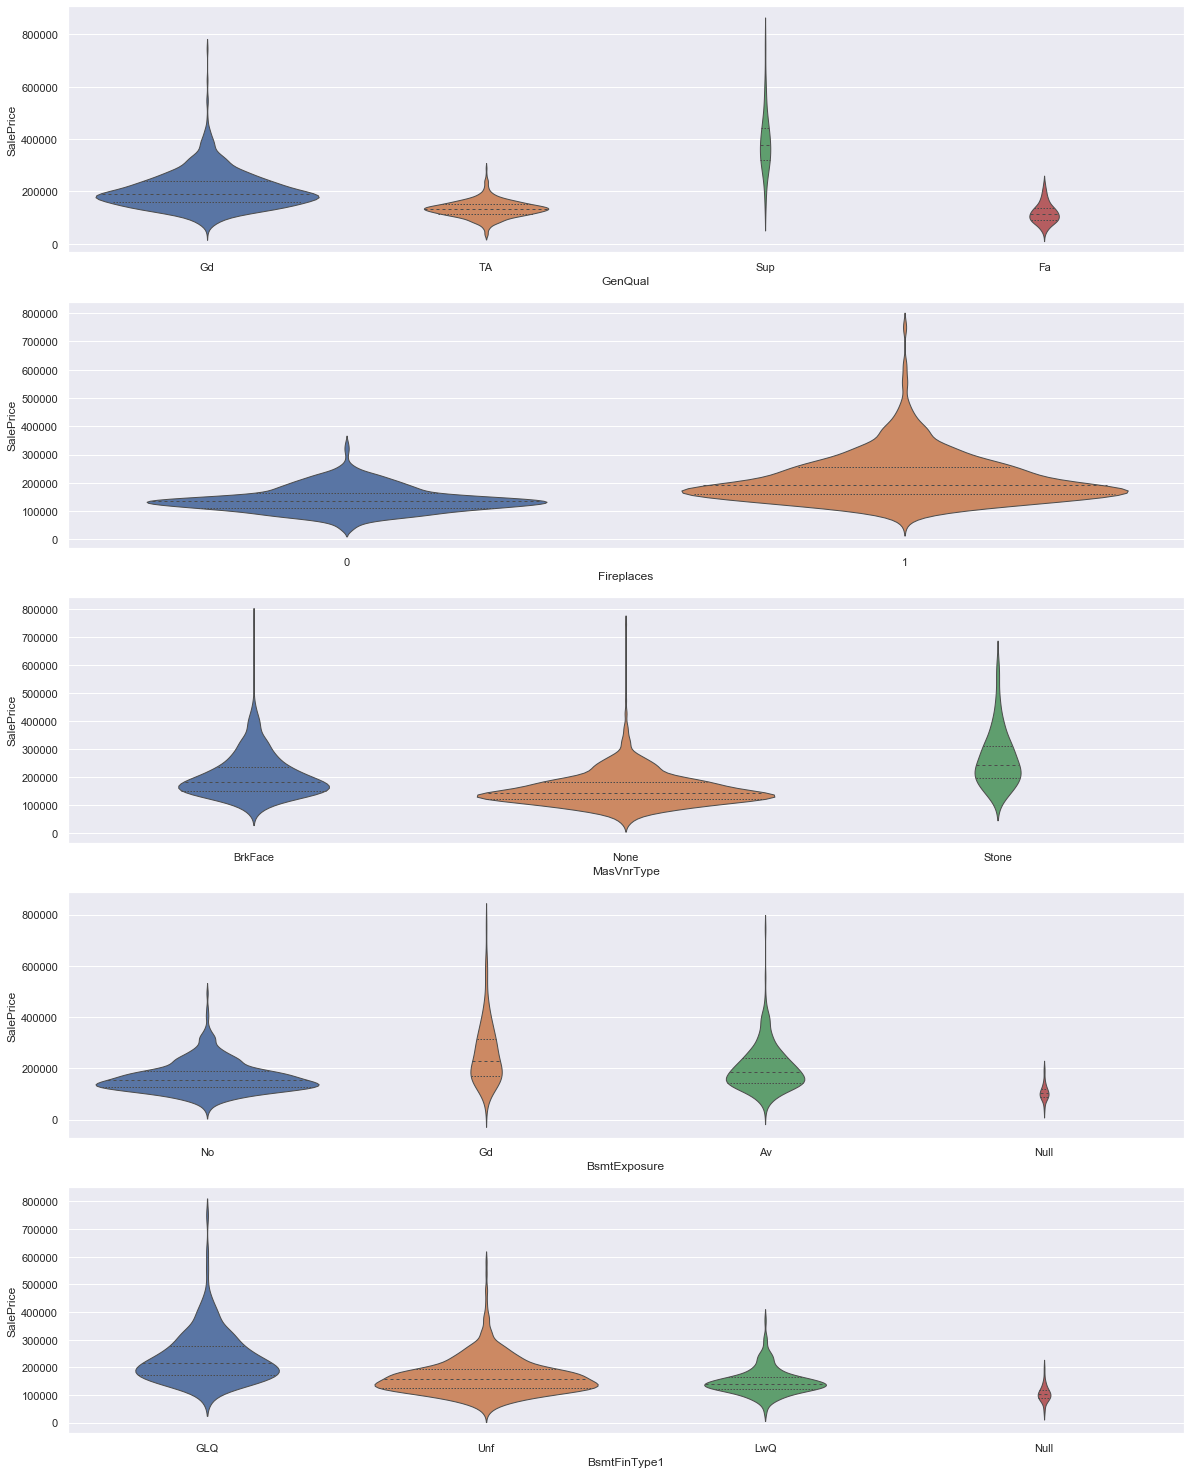

In [29]:
categorical_target_plot(train_exp,listx = ['GenQual','Fireplaces','MasVnrType','BsmtExposure','BsmtFinType1'], n=5, order = None)

In [30]:
column_list = ['ExterQual','BsmtQual','KitchenQual']
for variable in column_list:
    classes = train_exp[variable].unique()
    for subclass in classes:
        selectedData = train_exp[train_exp[variable] == subclass]
        sectionY = selectedData.SalePrice
        count = len(sectionY)
        mean = sectionY.mean()
        std = sectionY.std()
        high = False
        if mean > 250000:
            high = True
        print(f'variable: {variable} , subclass: {subclass}: count : {count}, mean: {mean}, std: {std}, High mean: {high} ' )

variable: ExterQual , subclass: Gd: count : 488, mean: 231633.51024590165, std: 71188.87389907481, High mean: False 
variable: ExterQual , subclass: TA: count : 906, mean: 144341.31346578366, std: 42471.815703322456, High mean: False 
variable: ExterQual , subclass: Ex: count : 52, mean: 367360.96153846156, std: 116401.2642002236, High mean: True 
variable: ExterQual , subclass: Fa: count : 14, mean: 87985.21428571429, std: 39826.918794238365, High mean: False 
variable: BsmtQual , subclass: Gd: count : 618, mean: 202688.4789644013, std: 58092.36428357409, High mean: False 
variable: BsmtQual , subclass: TA: count : 649, mean: 140759.81818181818, std: 43483.26531066869, High mean: False 
variable: BsmtQual , subclass: Ex: count : 121, mean: 327041.04132231406, std: 113563.23739238834, High mean: True 
variable: BsmtQual , subclass: Fa: count : 72, mean: 110533.02777777778, std: 32080.619965635004, High mean: False 
variable: KitchenQual , subclass: Gd: count : 586, mean: 212116.0238907

inspection categoricals subclasses using the t test

Nulls inspection

In [31]:
train_exp[my_categorical_selection].isna().sum()

MasVnrType       0
Fireplaces       0
SaleCondition    0
BsmtExposure     0
BsmtFinType1     0
dtype: int64

combing the quality variables

In [32]:
train_exp[train_exp.BsmtQual == 'TA'].pivot_table(columns = 'ExterQual', index = 'KitchenQual', values = 'SalePrice', aggfunc = 'count')

ExterQual,Ex,Fa,Gd,TA
KitchenQual,,,,
Ex,1.0,NaN,4.0,7.0
Fa,NaN,5.0,NaN,22.0
Gd,3.0,NaN,22.0,96.0
TA,NaN,4.0,16.0,469.0


#### Numerical variables inspection

Dates conversionand numerical conv

In [33]:
def years_vars_and_extra_numericasl(data,additional_numerical):
    data['year_age'] = data['YrSold'] - data['YearBuilt']
    data['year_remod'] = data['YrSold'] - data['YearRemodAdd']

    for column in additional_numerical:
        data[column] = data[column].astype('int',copy=False)
    
    return data

In [34]:
train_exp = years_vars_and_extra_numericasl(train_exp, additional_numerical)

In [35]:
numericals_columns = numericals_columns + additional_numerical + ['year_age','year_remod']

In [36]:
corr_num = train_exp[numericals_columns+ ['SalePrice']].corr()

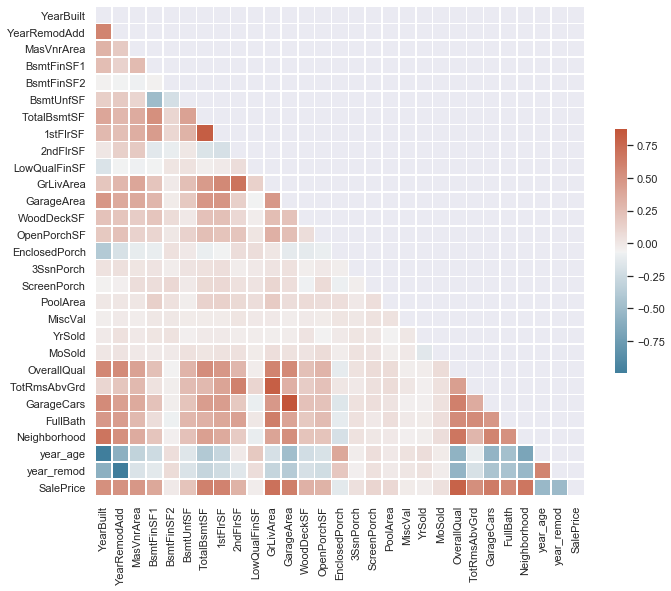

In [37]:
mask = np.triu(np.ones_like(corr_num , dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_num , mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
def crossed_numerical_target_plot(listx,n,target,order):
    csize = 7 * n/2
    a4_dims = (csize,15)
    fig, ax = plt.subplots(2, int(n/2) ,figsize=a4_dims)
    for y,x in zip(range(n),order):
        if y<=4:
            sns.scatterplot(ax = ax[0,y] ,data = train, x = listx[x], y = target)
            ax[0,y].set_title(listx[x])
        elif y<=10:
            sns.scatterplot(ax = ax[1,y-5] ,data = train, x = listx[x], y = target)
            ax[1,y-5].set_title(listx[x])
    return fig.show()

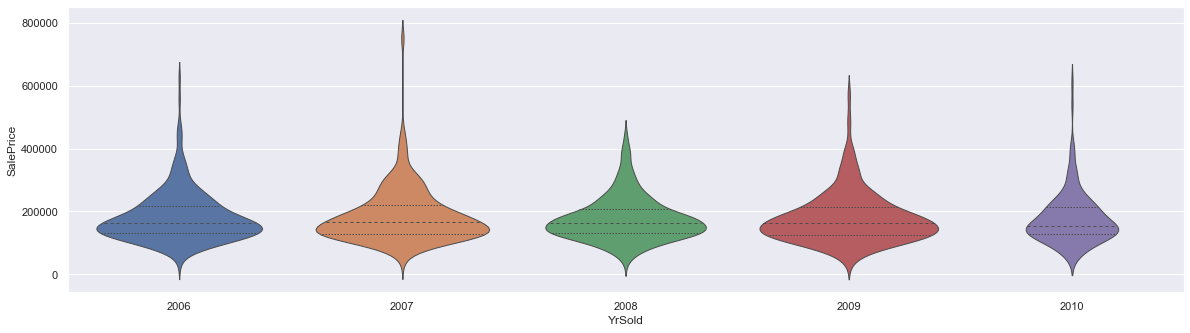

In [39]:
categorical_target_plot(train_exp,listx = ['YrSold'], n=1, order = [0,1])

In [40]:
def numerical_target_plot(data,listx,n,target,order):
    csize = 7 * n
    a4_dims = (csize,15)
    fig, ax = plt.subplots(2,n,figsize=a4_dims)
    for y,x in zip(range(n),order):
        sns.histplot(ax = ax[0,y], data=data, x=listx[x])
        sns.scatterplot(ax = ax[1,y] ,data = data, x = listx[x], y = target)
        ax[0,y].set_title(listx[x])
    return fig.show()

[0, 1, 2, 3, 4]


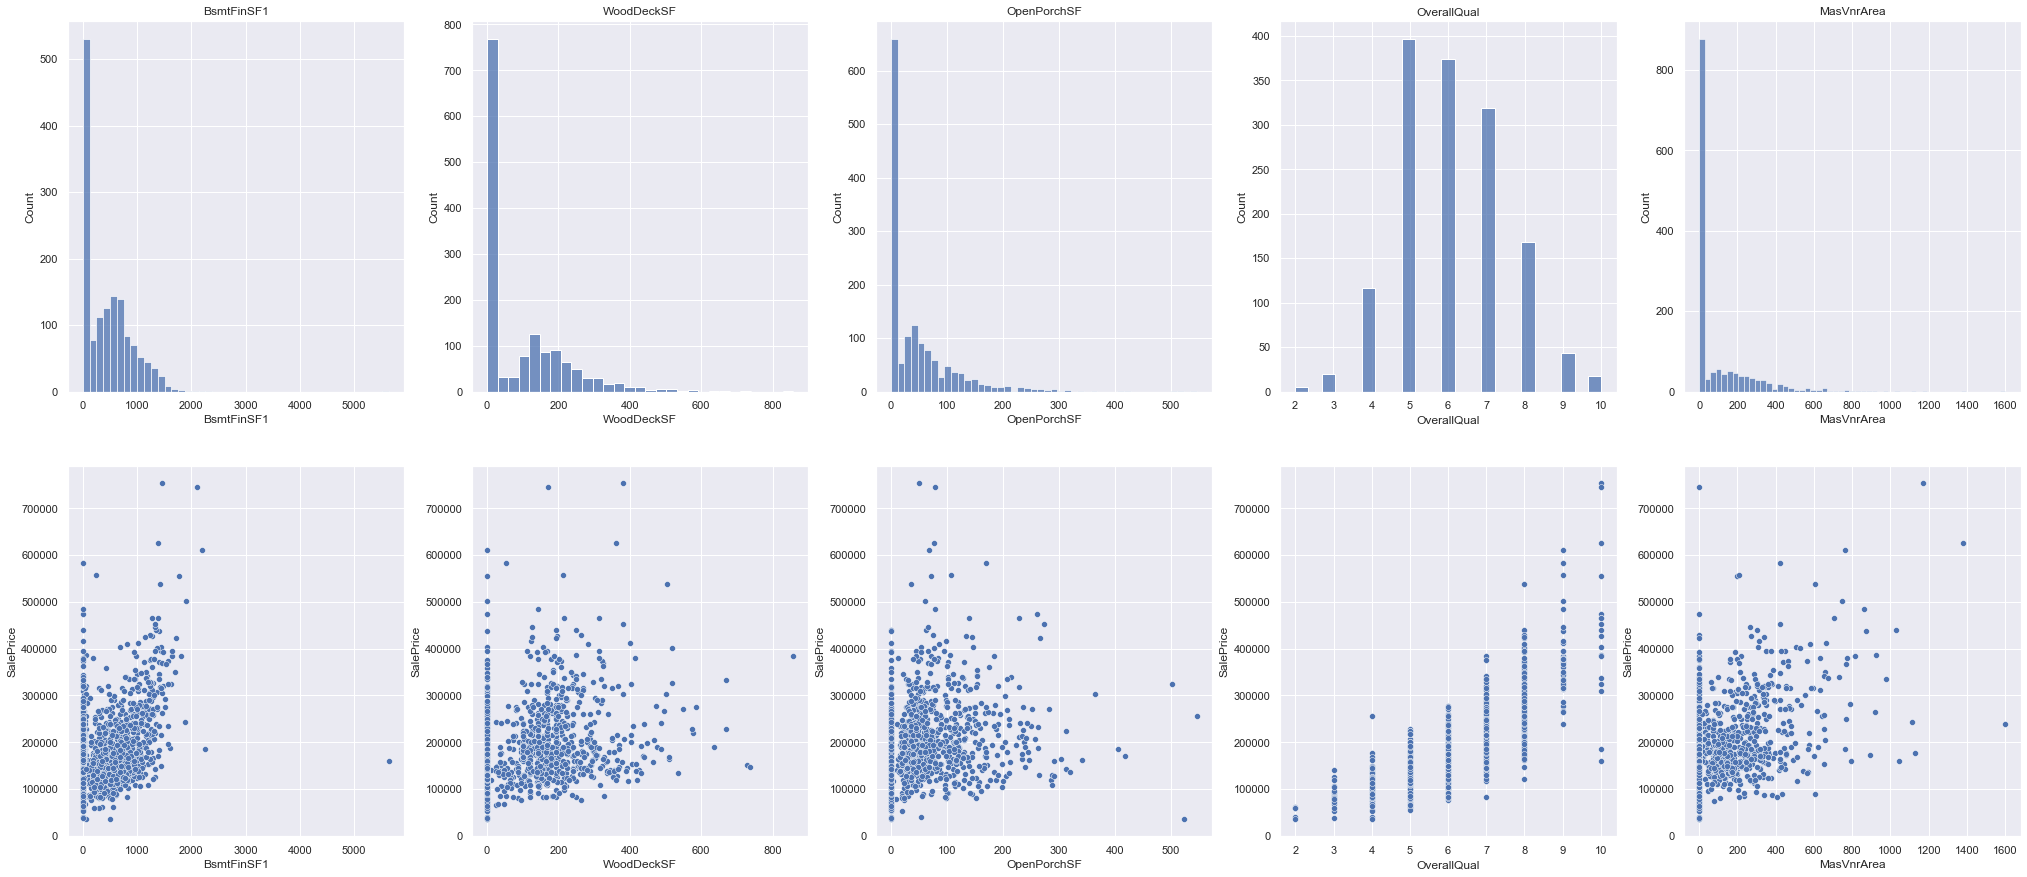

In [41]:
myrange = range(0,5)
print(list(myrange))
numerical_target_plot(train_exp,listx = ['BsmtFinSF1','WoodDeckSF','OpenPorchSF','OverallQual','MasVnrArea'], n=5, target = "SalePrice", order = myrange)

#### treating the outliers

In [42]:
def inspect_numerical(data, variable, target, subclass = None, split_num_density = None):

    if subclass != None and split_num_density == None:
        selectedData = data[data[variable] == subclass]
        print(target)
        sns.set(rc={'figure.figsize':(9,6)})
        sns.scatterplot(data = selectedData, x = target, y = 'SalePrice').set_title("Price Distribution")
        
    elif split_num_density:
        vector = data[data[split_num_density] != 0][split_num_density]
        q1, q2, q3, q4, q5 = np.quantile(vector, 0.1),np.quantile(vector, 0.25),np.quantile(vector, 0.5),np.quantile(vector, 0.75),np.quantile(vector, 1)
        data['quant'] = np.where( data[split_num_density] == 0,'O',
                        np.where( data[split_num_density] < q1,'A',
                        np.where( data[split_num_density] < q2,'B',
                        np.where( data[split_num_density] < q3,'C',
                        np.where( data[split_num_density] < q4,'D',
                        np.where( data[split_num_density] < q5,'E','F'
                            ))))))
        dict_quqnts = {'A':q1, 'B':q2, 'C':q3, 'D':q4, 'E':q5}
        if subclass != None:
            selectedData = data[data['quant'] == subclass]
            print(target)
            sns.set(rc={'figure.figsize':(9,6)})
            sns.scatterplot(data = selectedData, x = target, y = 'SalePrice').set_title("Price Distribution")
        else :
            classes = data['quant'].unique()
            print(f'numerical: {target}, categorical: {variable}, density numerical {split_num_density}, unique classes: {classes}')
            print(dict_quqnts)
            sns.set(rc={'figure.figsize':(9,6)})
            sns.scatterplot(data = data, x = target, y = 'SalePrice',hue = 'quant').set_title("Price Distribution")
    
        
    else:
        classes = data[variable].unique()
        print(f'numerical: {target}, categorical: {variable}, unique classes: {classes}')
        sns.set(rc={'figure.figsize':(9,6)})
        sns.scatterplot(data = data, x = target, y = 'SalePrice',hue = variable).set_title("Price Distribution")

In [43]:
def control_outlier_numerical(data):
    data['BsmtFinSF1'] = np.where( (data.BsmtFinSF1 > 2000) & (data.BsmtUnfSF > 0) & (data.BsmtUnfSF < 142) ,1800,
                        np.where( (data.BsmtFinSF1 > 2000) & (data.Neighborhood == 1) , 600,
                        np.where( (data.BsmtFinSF1 > 2000) & (data.SaleCondition == 'Abnorml'), 1800,
                        np.where( (data.BsmtFinSF1 > 2000) & (data.BsmtExposure == 'Av'), 1800, 
                        np.where( (data.BsmtFinSF1 > 2000) , 1800, data.BsmtFinSF1)
                        ))))
    data['TotalBsmtSF'] = np.where( (data.TotalBsmtSF > 2900) & (data.MasVnrType == 'None'), 2050,
                          np.where( (data.TotalBsmtSF > 2900) & (data.MasVnrType == 'BrkFace'), 1100,
                          np.where( (data.TotalBsmtSF > 2900) & (data.SaleCondition == 'Partial'), 1000,
                          np.where( (data.TotalBsmtSF > 2900) & (data.Neighborhood == 1), 1100,
                          np.where( (data.TotalBsmtSF > 2900) &  (data.OpenPorchSF > 112) & (data.OpenPorchSF < 547), 1100,
                          np.where( (data.TotalBsmtSF > 2900) &  (data.OpenPorchSF > 112) & (data.OpenPorchSF < 547), 1100,
                          np.where( (data.TotalBsmtSF > 2900) &  (data.OpenPorchSF == 0) , 1500,
                          np.where( (data.TotalBsmtSF > 2900) &  (data.OpenPorchSF > 63) & (data.OpenPorchSF < 112), 2050, data.BsmtFinSF1
                                  ))))))))
    data['GrLivArea'] = np.where( (data.GrLivArea > 4000) & (data.SaleCondition == 'Partial'), 1100,
                        np.where( (data.GrLivArea > 4000) & (data.GenQual == 'Fa'), 2000,
                        np.where( (data.GrLivArea > 3000) & (data.GrLivArea < 3450)  & (data.GenQual == 'Gd'),data.GrLivArea - 500 ,
                        np.where( (data.GrLivArea > 4200) & (data.GenQual == 'Gd'), 3200 ,
                        np.where( (data.GrLivArea > 4500) & (data.GenQual == 'Sup'), 2000 ,
                        np.where( (data.GrLivArea > 4000) & (data.GrLivArea < 4500) & (data.GenQual == 'Sup'), 3200 ,data.GrLivArea
                                ))))))
    data['TotRmsAbvGrd'] = np.where( (data.TotRmsAbvGrd > 11) & (data.MasVnrType == 'None'), 10,
                            np.where( (data.TotRmsAbvGrd > 11) & (data.Fireplaces == 0), 10,
                            np.where( (data.TotRmsAbvGrd > 11) & (data.SaleCondition == 'Abnorml'), 9,data.TotRmsAbvGrd
                                   )))
    return data

In [44]:
train_exp = control_outlier_numerical(train_exp)

numerical: GrLivArea, categorical: MasVnrType, unique classes: ['BrkFace' 'None' 'Stone']


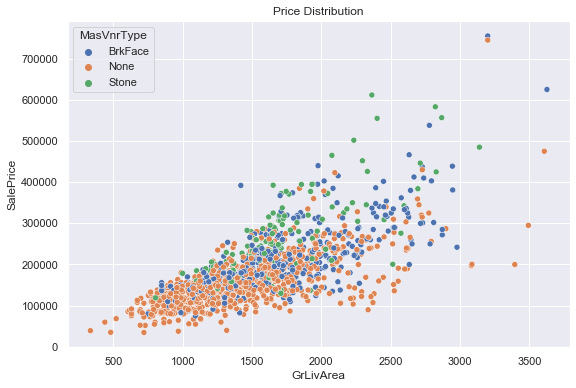

In [45]:
categorical = 'MasVnrType'
numerical = 'GrLivArea'
density_numerical = None
inspect_numerical(train_exp, categorical, numerical,None,density_numerical)

In [46]:
#inspect_numerical(train_exp, categorical, numerical, 'Stone1', density_numerical)

Visual inspection of numerical columns
* columns to drop:
    + 'BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','1stFlrSF','YrSold','MoSold''YearBuilt','YearRemodAdd'
* Possible to Drop 
    + 'WoodDeckSF','OpenPorchSF','TotRmsAbvGrd'

masks
* to create: with 2ndFlrSF then => true or false
* to create: with WoodDeckSF then => true or false
* to create: with OpenPorchSF then => true or false
* to create: with MasVnrArea then => true or false
* check: BsmtFinSF1 and BsmtUnfSF and TotalBsmtSF ==> create a feature BsmtUnfSF/TotalBsmtSF as rate and transform in function of the TotalBsmtSF then drop BsmtFinSF1 and BsmtUnfSF

In [47]:
aux_train = train_exp[['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF']].assign(artTotal = train.BsmtFinSF1 + train.BsmtUnfSF).assign(BsmtRate = train.BsmtFinSF1/train.TotalBsmtSF).copy()
aux_train[['TotalBsmtSF','BsmtFinSF1']].corr()

,TotalBsmtSF,BsmtFinSF1
TotalBsmtSF,1.000000,0.998059
BsmtFinSF1,0.998059,1.000000


In [48]:
aux_train[aux_train.BsmtFinSF1 != 0][['artTotal','TotalBsmtSF']].corr()

,artTotal,TotalBsmtSF
artTotal,1.000000,0.595782
TotalBsmtSF,0.595782,1.000000


In [49]:
aux_train[aux_train.BsmtUnfSF > aux_train.TotalBsmtSF].head()

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,artTotal,BsmtRate
3,216,540,216,756,0.285714
8,0,952,0,952,0.000000
13,0,1494,0,1494,0.000000
15,0,832,0,832,0.000000
19,504,525,504,1029,0.489796


In [50]:
def convert_TotalBsmtSF(TotalBsmtSF, BsmtFinSF1, BsmtUnfSF):
    art_total = BsmtFinSF1 + BsmtUnfSF
    if art_total != 0:
        result_rate = (art_total - BsmtUnfSF)/art_total
    elif art_total == 0:
        result_rate = 0
    elif BsmtFinSF1 == 0 and totalBsmtSF == 0:
        result_rate = 0
    return result_rate

In [51]:
train_exp['RateBsmt'] = train_exp.apply(lambda x: convert_TotalBsmtSF(x['TotalBsmtSF'], x['BsmtFinSF1'], x['BsmtUnfSF']), axis=1)

In [52]:
numericals_to_drop = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','1stFlrSF','YrSold','MoSold','YearBuilt','YearRemodAdd','GarageArea']

Redifining Variables List

In [53]:
categoricals_to_use = my_categorical_selection + ['GenQual']
numericals_to_use = [ x for x in numericals_columns if x not in numericals_to_drop] + ['RateBsmt']

#### Looking for hidden categories (high stv categories)

In [54]:
for variable in categoricals_to_use:
    classes = train_exp[variable].unique()
    for subclass in classes:
        selectedData = train_exp[train_exp[variable] == subclass]
        sectionY = selectedData.SalePrice
        count = len(sectionY)
        mean = sectionY.mean()
        std = sectionY.std()
        high_mean = False
        high_std = False
        if mean > 250000:
            high_mean = True
        if std > 70000:
            high_std = True
        if high_mean or high_std:
            print(f'variable: {variable} , subclass: {subclass}: count : {count}, mean: {mean}, std: {std}, High mean: {high_mean}, high std: {high_std}' )

variable: MasVnrType , subclass: BrkFace: count : 445, mean: 204691.87191011236, std: 81214.29355409252, High mean: False, high std: True
variable: MasVnrType , subclass: Stone: count : 136, mean: 263871.89705882355, std: 99504.75131304438, High mean: True, high std: True
variable: Fireplaces , subclass: 1: count : 770, mean: 216397.69220779222, std: 86843.90126247451, High mean: False, high std: True
variable: SaleCondition , subclass: Abnorml: count : 105, mean: 144911.3238095238, std: 81717.62521664459, High mean: False, high std: True
variable: SaleCondition , subclass: Partial: count : 125, mean: 272291.752, std: 103696.40411896702, High mean: True, high std: True
variable: BsmtExposure , subclass: Gd: count : 134, mean: 257689.80597014926, std: 118923.67258342211, High mean: True, high std: True
variable: BsmtExposure , subclass: Av: count : 335, mean: 201929.00597014924, std: 85110.29835584831, High mean: False, high std: True
variable: BsmtFinType1 , subclass: GLQ: count : 418,

In [55]:
def split_category_in_categorical(data):
    data['MasVnrType'] = np.where( (data.MasVnrType == 'BrkFace') & (data.year_remod > 22), 'BrkFaceN1',
                            np.where( (data.MasVnrType == 'BrkFace') & (data.year_remod <= 22), 'BrkFaceN0', data.MasVnrType))
    
    data['MasVnrType'] = np.where( (data.MasVnrType == 'Stone') & (data.year_remod > 8), 'Stone1',
                            np.where( (data.MasVnrType == 'Stone') & (data.year_remod <= 8), 'Stone0', data.MasVnrType))
    
    data['Fireplaces'] = np.where( (data.Fireplaces == 1) & (data.year_age > 23), 2,
                            np.where( (data.Fireplaces == 1) & (data.year_age <= 23), 1, data.Fireplaces)) ########
    
    data['BsmtFinType1'] = np.where( (data.BsmtFinType1 == 'GLQ') & (data.year_remod > 20), 'GLQ1',
                            np.where( (data.BsmtFinType1 == 'GLQ') & (data.year_remod <= 20), 'GLQ0', data.BsmtFinType1))
    
    return data

In [56]:
train_exp = split_category_in_categorical(train_exp)

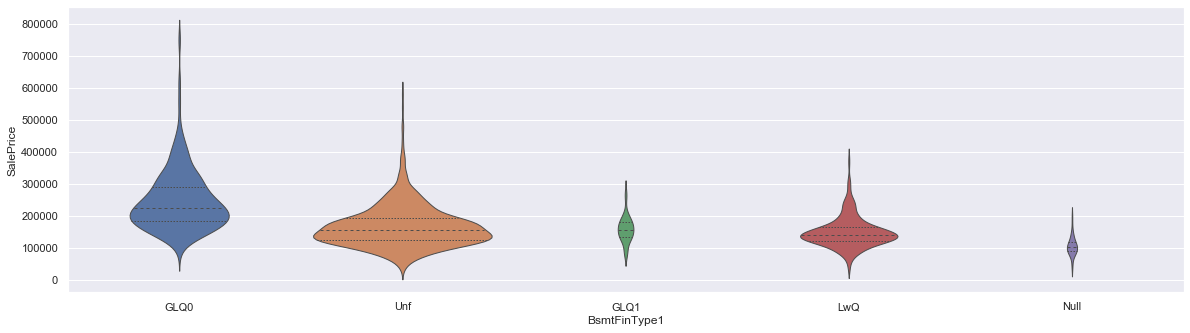

In [57]:
categorical = 'BsmtFinType1'
categorical_target_plot(train_exp,listx = [categorical], n=1, order = [0,1])

In [58]:
numerical = numericals_to_use[14]
#numerical = categoricals_to_use[5]
density_numerical = None
#inspect_numerical(train_exp, categorical, numerical,'GLQ',density_numerical)

### Finding combinations

In [59]:
def crossed_categorical_numerical_target_plot(data,listx,n,category,target,order):
    csize = 7 * n/2
    if n <= 5:
        a4_dims = (35 ,10)
        fig, ax = plt.subplots(1, 4 ,figsize=a4_dims)
    elif n <= 10:
        fig, ax = plt.subplots(2, 5 ,figsize=a4_dims)
    elif n <= 15:
        a4_dims = (csize,25)
        fig, ax = plt.subplots(3, 5 ,figsize=a4_dims)
        
    for y,x in zip(range(n),order):
        try:
            if y <= 4 and n > 5:
                sns.scatterplot(ax = ax[0,y] ,data = data, x = listx[x], y = target,hue= category)
                ax[0,y].set_title(listx[x], fontsize=18)
            elif y<=4 and n <= 5:
                sns.scatterplot(ax = ax[y] ,data = data, x = listx[x], y = target,hue= category)
                ax[0,y].set_title(listx[x], fontsize=18)
            elif y<=9:
                sns.scatterplot(ax = ax[1,y-5] ,data = data, x = listx[x], y = target,hue= category)
                ax[1,y-5].set_title(listx[x], fontsize=18)
            elif y<=15:
                sns.scatterplot(ax = ax[2,y-10] ,data = data, x = listx[x], y = target,hue= category)
                ax[2,y-10].set_title(listx[x], fontsize=18)
        except:
            pass
    return fig.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
category is: Fireplaces 


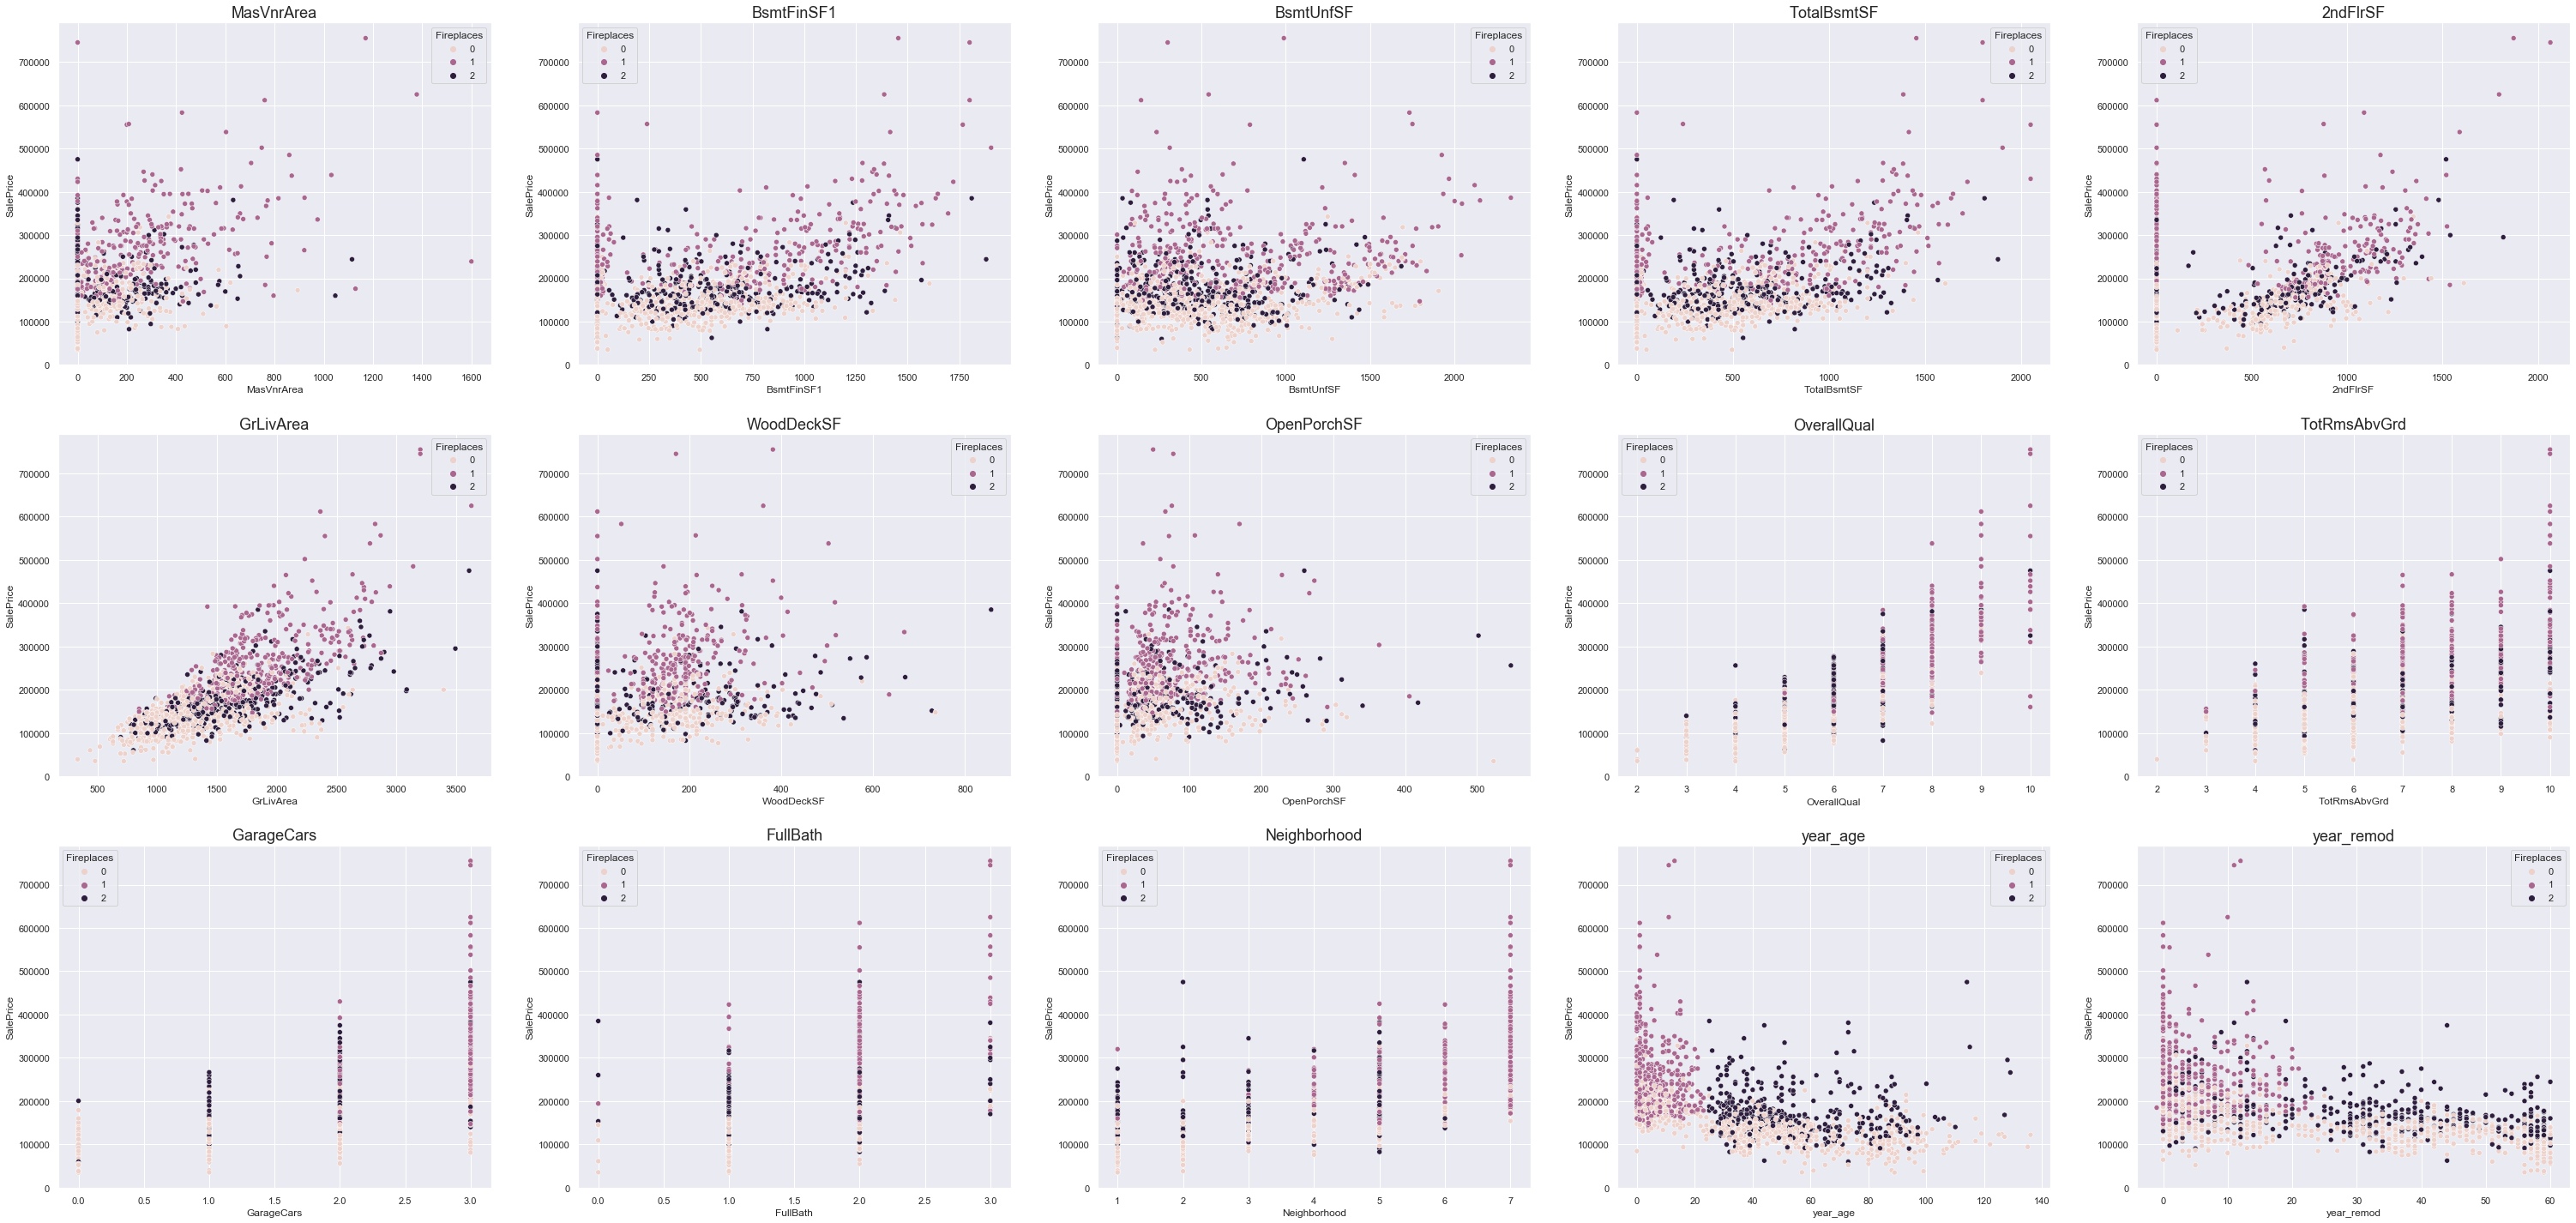

In [60]:
myrange = range(0,15)
print(list(myrange))
pivot_variable = "SalePrice"
category_to_hue = 'Fireplaces'
print(f'category is: {category_to_hue} ')
crossed_categorical_numerical_target_plot(data = train_exp, listx = numericals_to_use, n = 15, target = pivot_variable, order = myrange, category = category_to_hue )

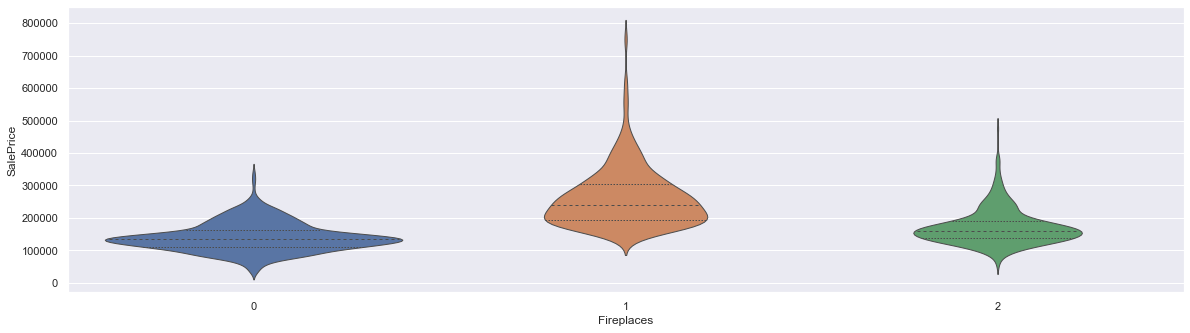

In [61]:
categorical_target_plot(train_exp,listx = [category_to_hue], n=1, order = [0,1])

[0, 1, 2, 3]
category is: Fireplaces 


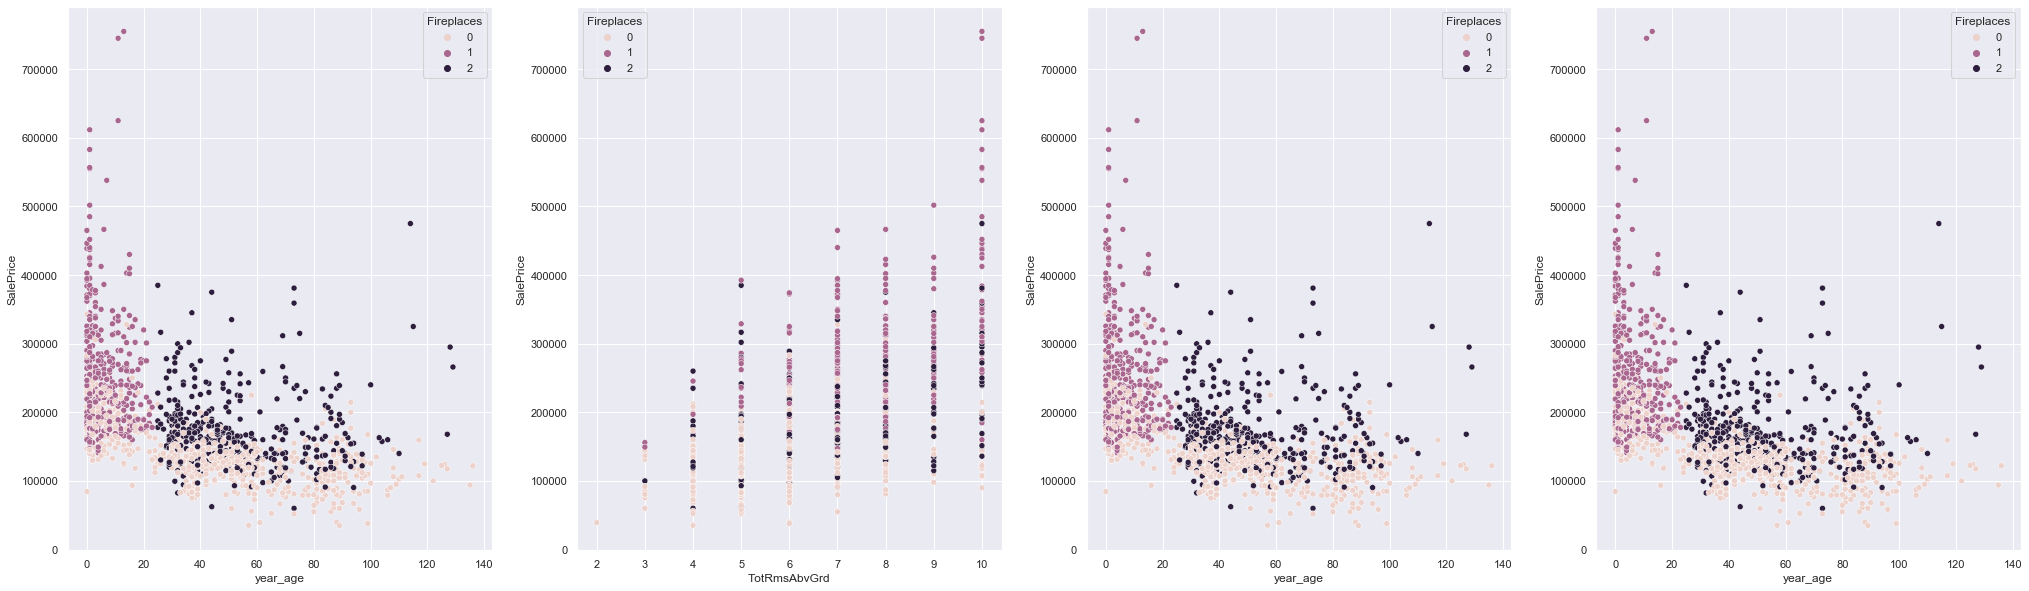

In [62]:
myrange = range(0,4)
print(list(myrange))
pivot_variable = "SalePrice"
listx_numericals = ['year_age',
'TotRmsAbvGrd',
'year_age',
'year_age']
print(f'category is: {category_to_hue} ')
crossed_categorical_numerical_target_plot(data = train_exp, listx = listx_numericals, n = 4, target = pivot_variable, order = myrange, category = category_to_hue )

In [63]:
train_exp[category_to_hue].unique()

array([0, 2, 1], dtype=int64)

year_age


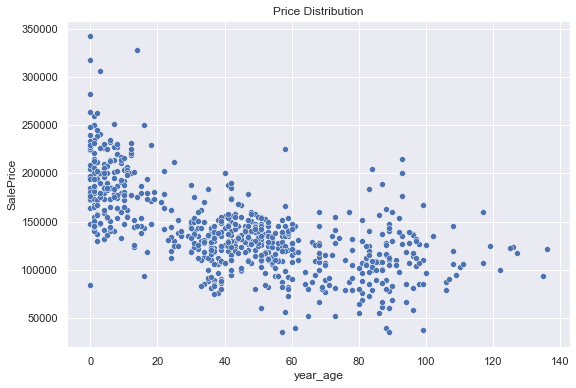

In [64]:
inspect_numerical(train_exp, category_to_hue, 'year_age', 0, None)

In [65]:
len(categoricals_to_use), len(numericals_to_use)

(6, 16)

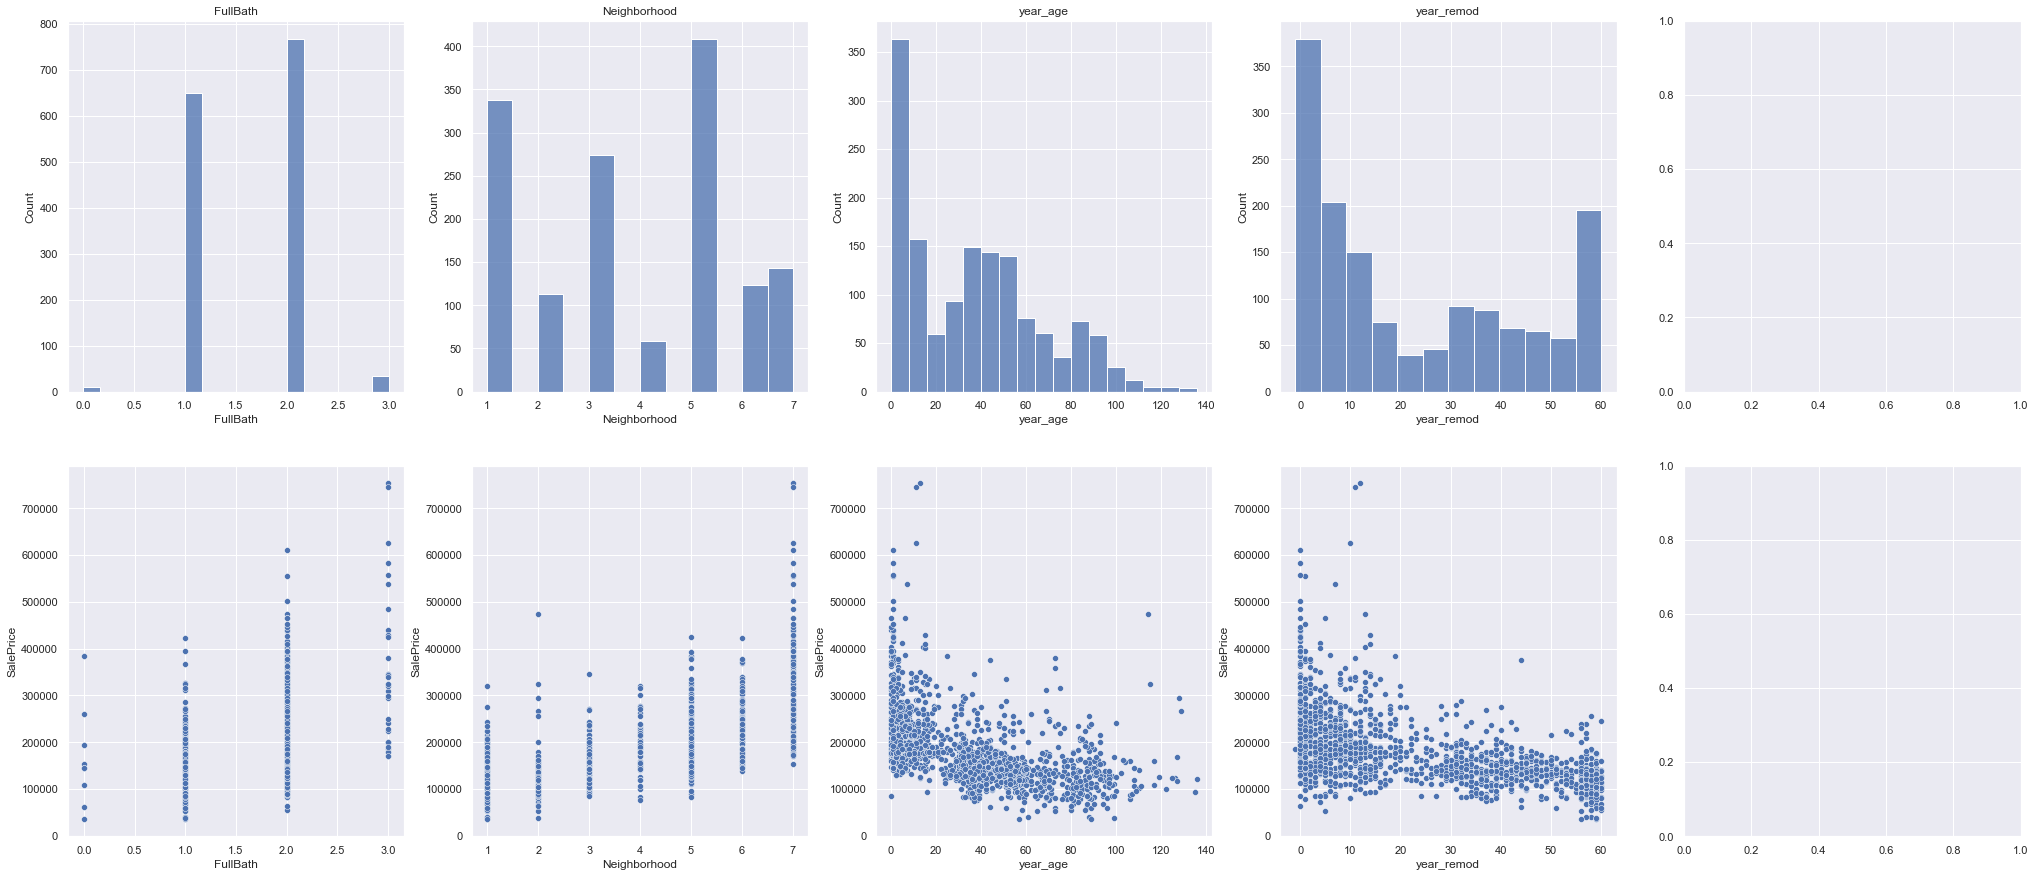

In [66]:
numerical_target_plot(train_exp,listx = ['FullBath','Neighborhood','year_age','year_remod'], n=5, target = "SalePrice", order = myrange)

In [67]:
train_exp[['GrLivArea','OverallQual','TotRmsAbvGrd','GarageCars','FullBath','Neighborhood','year_age','year_remod']].isna().sum()

GrLivArea       0
OverallQual     0
TotRmsAbvGrd    0
GarageCars      0
FullBath        0
Neighborhood    0
year_age        0
year_remod      0
dtype: int64

### Splitting train data

no time split

In [68]:
test.YrSold.unique(), train.YrSold.unique()

(array([2010, 2009, 2008, 2007, 2006], dtype=int64),
 array([2008, 2007, 2006, 2009, 2010], dtype=int64))

Try random split

In [69]:
seed = 158
validation_dataset = train.sample(frac = 0.25, replace = False, random_state = seed)
train_dataset = train[~train.index.isin(validation_dataset.index)]

#### Trying numerical variables conversion

smart conversion of  BsmtFinSF1 and BsmtUnfSF and TotalBsmtSF
<br>
and Masks for zero values in  numericals features

In [70]:
def mask_feature(feature):
    if feature == 0:
        return 0
    else:
        return 1

In [72]:
def feature_transformation_1(data, dict_to_replace, additional_numerical, replacer_categorical, replacer_categorical_2,
                             additional_numerical_list, numericals_to_mask):
    data = convert_categoricals(data, replacer_categorical, replacer_categorical_2)

    data = years_vars_and_extra_numericasl(data, additional_numerical_list)

    data['RateBsmt'] = data.apply(lambda x: convert_TotalBsmtSF(x['TotalBsmtSF'], x['BsmtFinSF1'], x['BsmtUnfSF']),
                                  axis=1)
    
    for to_mask in numericals_to_mask:
        label = f'Mask{to_mask}'
        data[label] = data.apply(lambda x: mask_feature(x[to_mask]), axis=1)

    data = control_outlier_numerical(data)
    data = split_category_in_categorical(data)

    return data

In [74]:
train_dataset = feature_transformation_1(train_dataset, dict_to_replace, additional_numerical, replacer_categorical,
                                         replacer_categorical_2,additional_numerical,[])

In [75]:
train_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [76]:
categoricals_to_use.append('Mask2ndFlrSF')
categoricals_to_use.append('MaskWoodDeckSF')
categoricals_to_use.append('MaskOpenPorchSF')
categoricals_to_use.append('MaskMasVnrArea')
numericals_to_use.append('RateBsmt')
numericals_to_use.remove('BsmtFinSF1')
numericals_to_use.remove('BsmtUnfSF')

modeling will make a interation regressions 

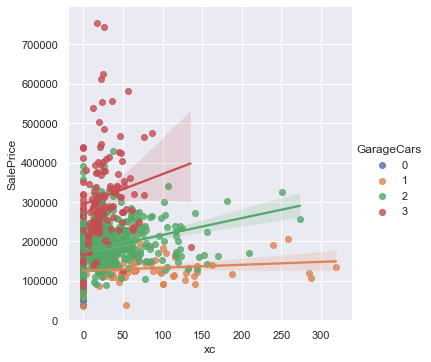

In [77]:
x1 = 'OpenPorchSF'
x2 = 'GarageCars'
train_dataset['xc'] =  np.divide(train_dataset[x1].astype('float'), train_dataset[x2].astype('float'), out=np.zeros_like(train_dataset[x1].astype('float')), where=train_dataset[x2].astype('float')!=0)

y = "SalePrice"

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lmplot(data = train_dataset, x = 'xc', y = y, hue = x2)

----

### Conclusions:
* Numericals
    + 'GrLivArea','OverallQual','TotRmsAbvGrd','GarageCars','FullBath','Neighborhood','year_age','year_remod'
* categoricals
    + 'MasVnrType','Fireplaces','SaleCondition','BsmtExposure','BsmtFinType1','GenQual' 
* Some functions for cleaning data must be used
* try non linear combinations